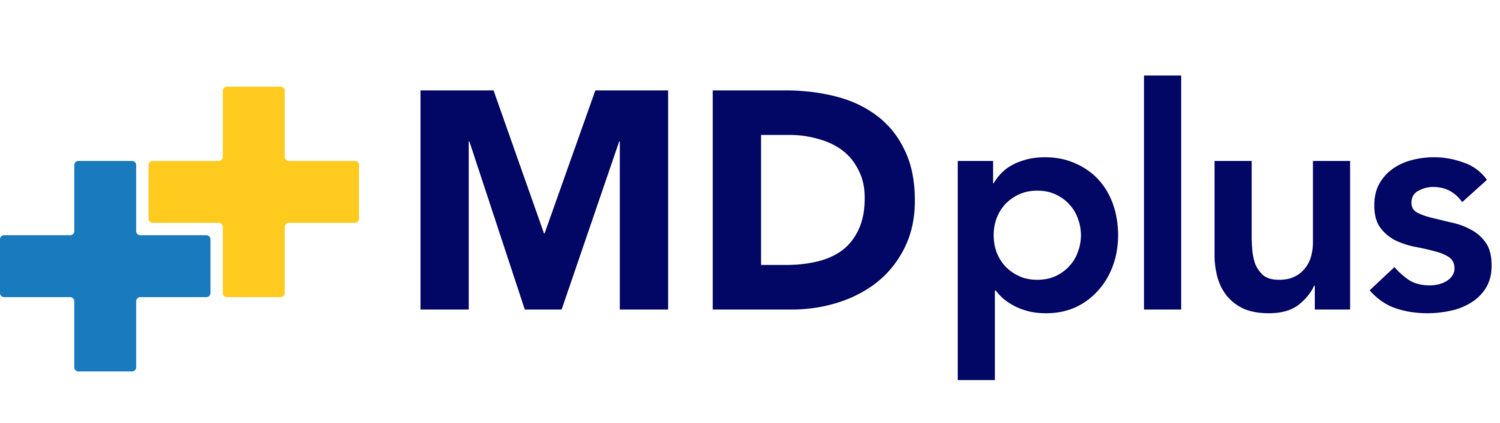

#**<font color="mediumslateblue">MD</font><font color="goldenrod">Plus</font> Convolutional Neural Network Module**

In this module, we will go over how to set up and train an convolutional neural network (CNN)-based image classifier model and adapt it to your own needs.  Image classifier models are becoming increasingly popular in the clinical space by enabling faster and earlier interpretation of medical images across modalities like X-ray, CT, and MRI.  For example, a 2023 [Nature paper](https://www.nature.com/articles/s41586-023-06555-x) from Zhou et al. describes a novel computer vision model called RETFound that produced impressive results in classifying diseases from standard retinal imaging.

This script has a:

- <font color="mediumslateblue">Walkthrough</font>: High-level overview and walkthrough of the architecture of a convolutional neural network.

- <font color="mediumslateblue">No Code</font> version: Automated non-tutorial script with a user interface to finetune a model with your own custom training set.

- <font color="mediumslateblue">Beginner</font> version: Covers finetuning a pre-trained model on a sample dataset of images.

- <font color="goldenrod">Advanced</font> version: Covers building a simple CNN based computer vision model for classifying pathology images.

Please expand the version you wish to use and follow the instructions accordingly.

At the end you will see a <font color="mediumslateblue">bonus script</font> trained on a large ChestXR imageset.

For questions please reach out to sahil.suresh@tufts.edu

##Convolutional Neural Networks

At its core, a <font color="mediumslateblue">convolutional neural network (CNN)</font> is a type of artificial intelligence that is particularly good at processing and analyzing visual information. For clinicians, this technology is transformative. It can be used to:

- Detect and classify diseases in X-rays, CT scans, and MRIs.
- Segment organs and abnormalities, meaning it can outline the precise boundaries of a tumor or organ.
- Enhance the quality of medical images, potentially revealing details that were previously unclear.

A helpful analogy is to think of a CNN as a team of medical students. Each student is taught to look for one very specific, simple <font color="mediumslateblue">feature</font>. For example, one student only looks for bright, circular shapes. Another only looks for sharp, dark lines. A third looks for a specific texture. None of these individual findings mean much on their own. However, by combining the reports from all these "students," a more senior "resident" can piece together a complex diagnosis. This is, in essence, how a CNN works—by <font color="mediumslateblue">building a hierarchical understanding of an image from simple patterns to complex structures.</font>

##Part 1: The Input: What a Computer "Sees"

Before we can understand how a CNN works, we must first understand what an image looks like to a computer. To us, an image is a collection of shapes, colors, and textures. To a computer, <font color="mediumslateblue">an image is simply a grid of numbers.</font>

Each number represents the <font color="mediumslateblue">intensity of a single pixel</font>. For a grayscale image, this might be a number from 0 (black) to 255 (white). For a color image (RGB), it's actually three overlapping grids: one for Red, one for Green, and one for Blue.

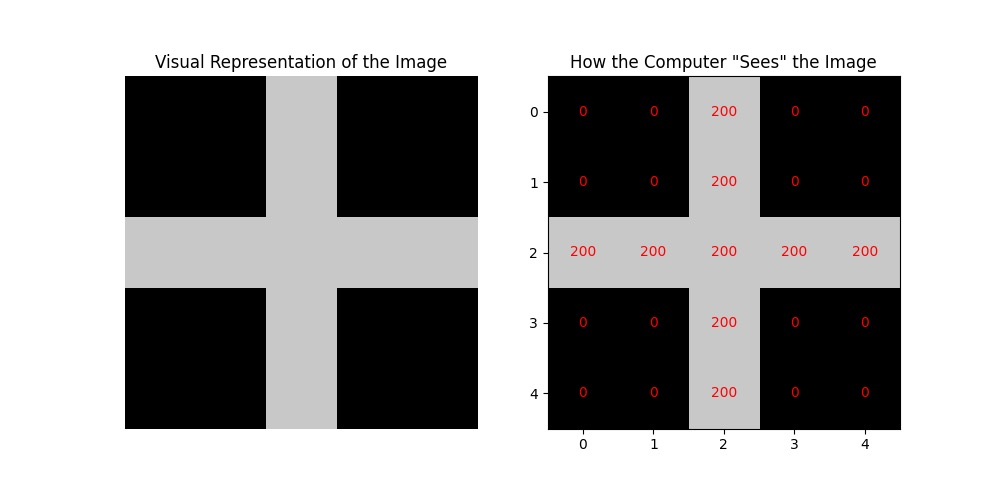

##Part 2: The Core Concept: The Convolution

Now that we understand how a computer sees an image, we can explore the fundamental operation of a CNN: <font color="mediumslateblue">the convolution.</font>

Imagine you have a small magnifying glass that is trained to find a specific, simple pattern such as a vertical edge. In CNN terminology, this magnifying glass is called a <font color="mediumslateblue">filter or a kernel.</font> A kernel is just a small grid of numbers, like our image. This kernel will slide over every part of the input image, checking for the pattern it's designed to detect.

Let's say we want to detect a vertical line. A simple kernel for this might look like this:

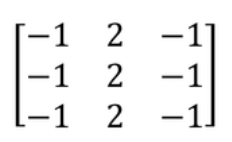

This kernel is designed to give a high positive score when it's centered over a bright vertical line and a low score otherwise.  The convolution operation involves two steps at each position:

- <font color="mediumslateblue">Element-wise Multiplication</font>: The kernel is placed over a part of the image. Each number in the kernel is multiplied by the corresponding pixel value underneath it.
- <font color="mediumslateblue">Summation</font>: All the results of the multiplication are added together to produce a single number. This number becomes a pixel in a new image called a <font color="mediumslateblue">feature map.</font>

The <font color="mediumslateblue">feature map</font> is, therefore, a new representation of the image that highlights where the specific feature is located.

Let's visualize this process with an animation. We will use a simple kernel to detect a vertical edge in our "plus" sign image.  Note that the kernel we use here is specifically is designed to detect a right edge, hence the colormap distribution that you see in the resulting feature map.

In [ ]:
#@title Convolution Animation - Hit Play
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

image = np.zeros((10, 10))
image[4:6, 2:8] = 255
image[2:8, 4:6] = 255

kernel = np.array([
    [10, 0, -10],
    [10, 0, -10],
    [10, 0, -10]
]) / 30.0

output_shape = (image.shape[0] - kernel.shape[0] + 1, image.shape[1] - kernel.shape[1] + 1)
output = np.zeros(output_shape)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('The Convolution: Sliding a Filter to Create a Feature Map', fontsize=16)
fig.tight_layout(rect=[0, 0.05, 1, 0.95])

im1 = ax1.imshow(image, cmap='gray', vmin=0, vmax=255)
ax1.set_title("Input Image")
ax1.set_xticks([])
ax1.set_yticks([])

max_abs_val = 255.0
im2 = ax2.imshow(output, cmap='viridis', vmin=-max_abs_val, vmax=max_abs_val)
ax2.set_title("Output Feature Map")
ax2.set_xticks([])
ax2.set_yticks([])

input_patch = plt.Rectangle(( -0.5, -0.5), 3, 3, edgecolor='red', facecolor='none', lw=2)
ax1.add_patch(input_patch)
output_pixel = plt.Rectangle((-0.5, -0.5), 1, 1, edgecolor='red', facecolor='none', lw=2)
ax2.add_patch(output_pixel)

calc_text = fig.text(0.5, 0.05, "", ha='center', fontsize=12, family='monospace')

def update(frame):
    row = frame // output.shape[1]
    col = frame % output.shape[1]

    roi = image[row:row+3, col:col+3]
    result = np.sum(roi * kernel)
    output[row, col] = result

    input_patch.set_xy((col - 0.5, row - 0.5))
    output_pixel.set_xy((col - 0.5, row - 0.5))
    im2.set_data(output)

    op_str = "sum(patch * kernel)"
    calc_text.set_text(f"Output at ({row},{col}) = {op_str} = {result:.1f}")

    return [im1, im2, input_patch, output_pixel, calc_text]

anim = FuncAnimation(fig, update, frames=output.size, interval=100, blit=True)
plt.close(fig)

HTML(anim.to_jshtml())


As we saw, the convolution operation uses a kernel to scan an image and produce a <font color="mediumslateblue">feature map.</font> But a single feature is not enough to understand a complex medical image. To build a rich understanding, a CNN uses not just one, but dozens or even <font color="mediumslateblue">hundreds of different kernels in a single layer.</font>

Each kernel is tuned to detect a <font color="mediumslateblue">different simple feature</font>: One kernel might find horizontal edges.  Another might find 45-degree angles.  Others could be specialized to find simple curves, color gradients, or specific textures.

After passing our input image through a <font color="mediumslateblue">convolutional layer</font>, we don't have just one feature map, but a whole stack of them.  When you stack all these annotations together, you get a richer representation of the original slide than any single annotation could provide.

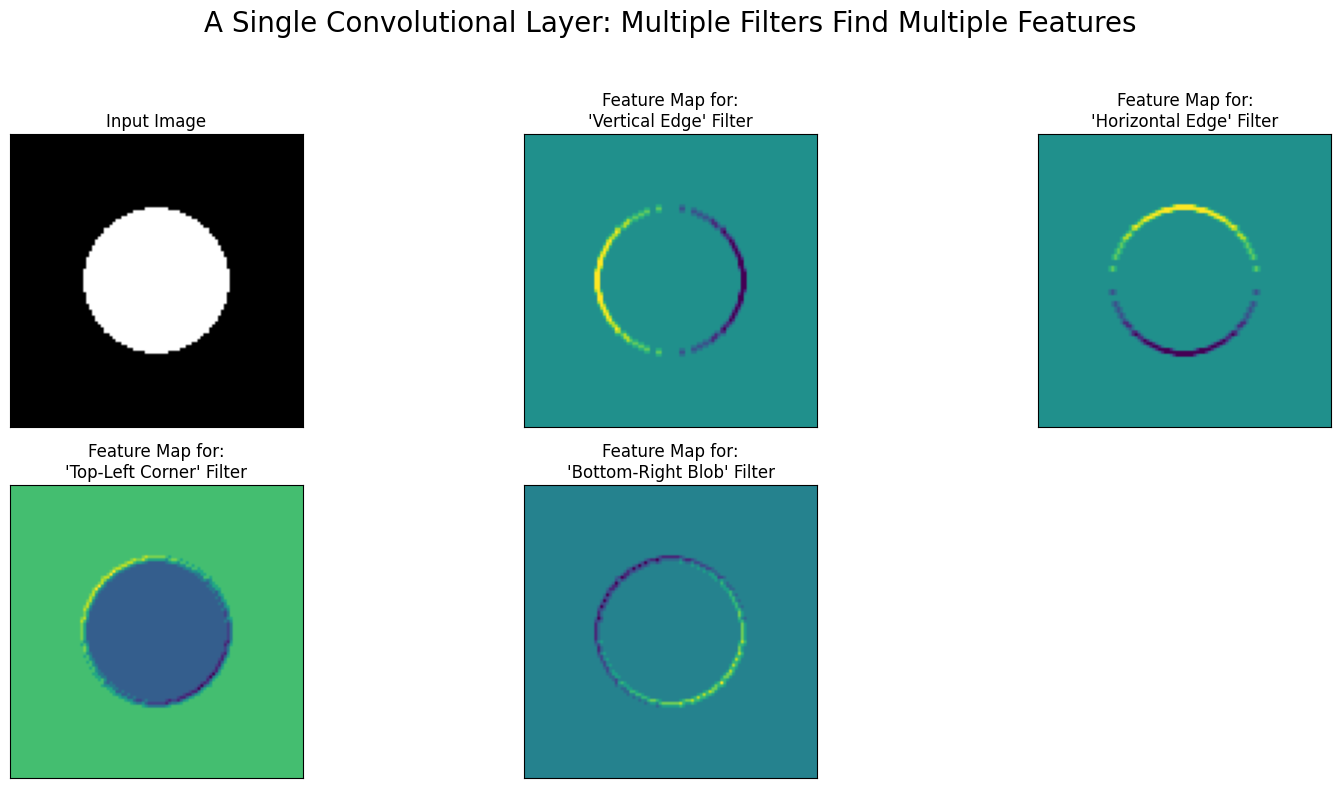

##Part 3: ReLU and Max Pooling


After the convolution, two simple but crucial steps typically occur.

- <font color="mediumslateblue">ReLU (Rectified Linear Unit)</font>
This sounds complicated, but the concept is straightforward. It's a <font color="mediumslateblue">"gatekeeper"</font> that says: "If a feature was detected (the number is positive), let the signal pass. If it wasn't (the number is negative), block the signal (set it to zero)."

This helps the network focus only on the features that were actually found.

- <font color="mediumslateblue">Max Pooling (Downsampling)</font>
The feature maps are still very large and detailed. This is computationally expensive and can cause the network to memorize noise instead of learning the true underlying patterns (a problem called <font color="mediumslateblue">overfitting</font>).

<font color="mediumslateblue">Max Pooling</font> is a way to shrink the feature maps while keeping the most important information. It works like this:

1. Look at a small window of the feature map (e.g., a 2x2 area).
2. Find the largest value within that window.
3. Keep only that largest value and discard the rest.
4. Slide the window over and repeat.

The intuition here is that the model doesn't need to know exactly where the feature was, just that it was present in a general area. This makes the representation more computationally efficient.

Let's watch a <font color="mediumslateblue">Max Pooling</font> operation shrink a feature map below.

In [ ]:
#@title Max Pooling Animation - Hit Play
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from scipy.signal import convolve2d
from IPython.display import HTML
import seaborn as sns

x, y = np.meshgrid(np.linspace(-1, 1, 100), np.linspace(-1, 1, 100))
d = np.sqrt(x*x + y*y)
circle_image = (d < 0.5).astype(float) * 255
vertical_edge_kernel = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
feature_map = convolve2d(circle_image, vertical_edge_kernel, mode='same')

small_map = feature_map[40:50, 20:30]
pool_size = 2
pooled_output = np.zeros((small_map.shape[0] // pool_size, small_map.shape[1] // pool_size))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('Max Pooling: Summarizing a Feature Map', fontsize=16)

ax1.set_title("Original Feature Map Patch")
sns.heatmap(small_map, annot=True, fmt=".0f", cmap='viridis', cbar=False, ax=ax1, annot_kws={"color": "white"})
ax1.set_xticks([])
ax1.set_yticks([])

ax2.set_title(f"Pooled Output ({pool_size}x{pool_size} window)")
ax2.set_xticks([])
ax2.set_yticks([])

input_patch = plt.Rectangle((0,0), pool_size, pool_size, edgecolor='red', facecolor='none', lw=3)
ax1.add_patch(input_patch)

def update(frame):
    row_out = frame // pooled_output.shape[1]
    col_out = frame % pooled_output.shape[1]

    row_in = row_out * pool_size
    col_in = col_out * pool_size

    roi = small_map[row_in:row_in+pool_size, col_in:col_in+pool_size]
    max_val = np.max(roi)
    pooled_output[row_out, col_out] = max_val

    input_patch.set_xy((col_in-0.5, row_in-0.5))

    ax2.clear()
    sns.heatmap(pooled_output, annot=True, fmt=".0f", cmap='viridis', cbar=False, ax=ax2,
                vmin=np.min(small_map), vmax=np.max(small_map), annot_kws={"color": "white"})
    ax2.set_title(f"Pooled Output ({pool_size}x{pool_size} window)")

    output_pixel = plt.Rectangle((col_out-0.5, row_out-0.5), 1, 1, edgecolor='red', facecolor='none', lw=3)
    ax2.add_patch(output_pixel)

    return [input_patch]

anim = FuncAnimation(fig, update, frames=pooled_output.size, interval=400, blit=False)
plt.close(fig)
HTML(anim.to_jshtml())

##Part 4: Stacking Layers to Build the Hierarchy

This is where the magic happens. <font color="mediumslateblue">A CNN isn't just one convolutional layer; it's a stack of them.</font>

- **Layer 1**: As we've seen, this layer learns to detect very simple features: edges, corners, color gradients.
- **Layer 2**: This layer doesn't see the original image. Its input is the stack of feature maps from Layer 1. Its filters learn to find patterns in the patterns—combining edges and corners to detect more complex shapes like eyes, noses, or simple textures.
- **Layer 3 and beyond**: This continues, with each subsequent layer learning to combine the features from the previous layer into ever more complex and abstract concepts. It might combine "eye," "nose," and "mouth" features to detect a "face," or "spiculated margin" and "microcalcification" features to detect a "suspicious lesion."

<font color="mediumslateblue">This is the core principle: a hierarchy of feature detection, moving from pixels to concepts.</font>

This is beautifully analogous to the <font color="mediumslateblue">human visual cortex</font>, where neurons in area V1 respond to simple orientations, and their outputs are combined in V2 to detect shapes, which are in turn combined in higher areas to recognize objects.

In [ ]:
#@title The CNN Feature Hierarchy - Hit Play
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

fig = plt.figure(figsize=(7, 3.5))
gs = fig.add_gridspec(2, 2, height_ratios=[1, 0.15])

ax_input = fig.add_subplot(gs[0, 0])
ax_features = fig.add_subplot(gs[0, 1])
ax_status = fig.add_subplot(gs[1, :])

for ax in [ax_input, ax_features, ax_status]:
    ax.set_xticks([])
    ax.set_yticks([])
    ax.axis('off')

ax_input.set_title("Input Image", fontsize=10, weight='bold')
ax_features.set_title("Feature Construction", fontsize=10, weight='bold')
fig.suptitle("How a CNN Builds Understanding", fontsize=12, y=1.05)
status_text_font_size = 9

center = (0.5, 0.5)
base_angles = np.linspace(0, 2 * np.pi, 50)
base_radii = 0.3 + 0.05 * np.sin(base_angles * 5)
base_x = center[0] + base_radii * np.cos(base_angles)
base_y = center[1] + base_radii * np.sin(base_angles)
lesion_path = np.vstack([base_x, base_y]).T

ax_input.add_patch(patches.Polygon(lesion_path, closed=True, color='red', alpha=0.5))
ax_input.set_xlim(0, 1)
ax_input.set_ylim(0, 1)

artists = []
status_text = ax_status.text(0.5, 0.5, "Starting...", ha='center', va='center', fontsize=status_text_font_size)
artists.append(status_text)

l1_lw = 1.0
l2_lw = 2.0
l3_lw = 2.5

l1_features = []
for i in range(0, len(base_x) - 1, 3):
    l1_features.append(ax_features.plot(base_x[i:i+2], base_y[i:i+2], color='gray', lw=l1_lw, alpha=0)[0])
    if i % 9 == 0:
        l1_features.append(ax_features.add_patch(patches.Circle((center[0] + np.random.uniform(-0.1, 0.1), center[1] + np.random.uniform(-0.1, 0.1)), 0.01, color='gray', alpha=0)))
artists.extend(l1_features)

l2_features = []
for i in range(0, len(base_x) - 1, 9):
    arc = patches.PathPatch(patches.Path(lesion_path[i:i+5]), facecolor='none', edgecolor='orange', lw=l2_lw, alpha=0)
    l2_features.append(ax_features.add_patch(arc))
artists.extend(l2_features)

l3_features = []
margin_outline = patches.Polygon(lesion_path, closed=True, edgecolor='yellow', facecolor='none', lw=l3_lw, alpha=0)
l3_features.append(ax_features.add_patch(margin_outline))
artists.extend(l3_features)

ax_features.set_xlim(0, 1)
ax_features.set_ylim(0, 1)

TOTAL_FRAMES = 110
PHASE1_END = 40
PHASE2_END = 80

def update(frame):
    if frame < PHASE1_END:
        status_text.set_text("Layer 1: Finding basic edges...")
        idx = frame % len(l1_features)
        l1_features[idx].set_alpha(1.0)
    elif frame < PHASE2_END:
        status_text.set_text("Layer 2: Combining edges...")
        if frame == PHASE1_END:
            for feat in l1_features: feat.set_alpha(0.2)
        idx = (frame - PHASE1_END) % len(l2_features)
        l2_features[idx].set_alpha(1.0)
    else:
        status_text.set_text("Deep Layers: Assembling 'Spiculated Margin'...")
        if frame == PHASE2_END:
            for feat in l2_features: feat.set_alpha(0.2)
        margin_outline.set_alpha(min(1.0, (frame - PHASE2_END) / (TOTAL_FRAMES - PHASE2_END)))
    return artists

anim = FuncAnimation(fig, update, frames=TOTAL_FRAMES, interval=100, blit=False)
plt.tight_layout(rect=[0, 0, 1, 0.9])
plt.close(fig)
HTML(anim.to_jshtml())

##Part 5: The Classifier Layer

After several layers of convolutions and pooling, the network has successfully transformed the raw pixel data into a <font color="mediumslateblue">compact, high-level set of feature representations.</font> We no longer have a "grid" but rather a list of values that essentially say "how much of feature X, Y, or Z is present."

This leads to the final part of the network, the <font color="mediumslateblue">Classifier.</font>

- <font color="mediumslateblue">Flattening</font>: The final stack of 2D feature maps is "flattened" into a single, long 1D list of numbers.
- <font color="mediumslateblue">Decision Making</font>: This list is fed into a more <font color="mediumslateblue">traditional neural network</font>. This part of the network learns which combinations of high-level features are associated with which final class. For example, it might learn that:

1. High value for "**Spiculated Margin**" feature + High value for "**Irregular Shape**" feature = High probability of "**Malignant**".
2. High value for "**Smooth Border**" feature + High value for "**Homogeneous Texture**" feature = High probability of "**Benign**".

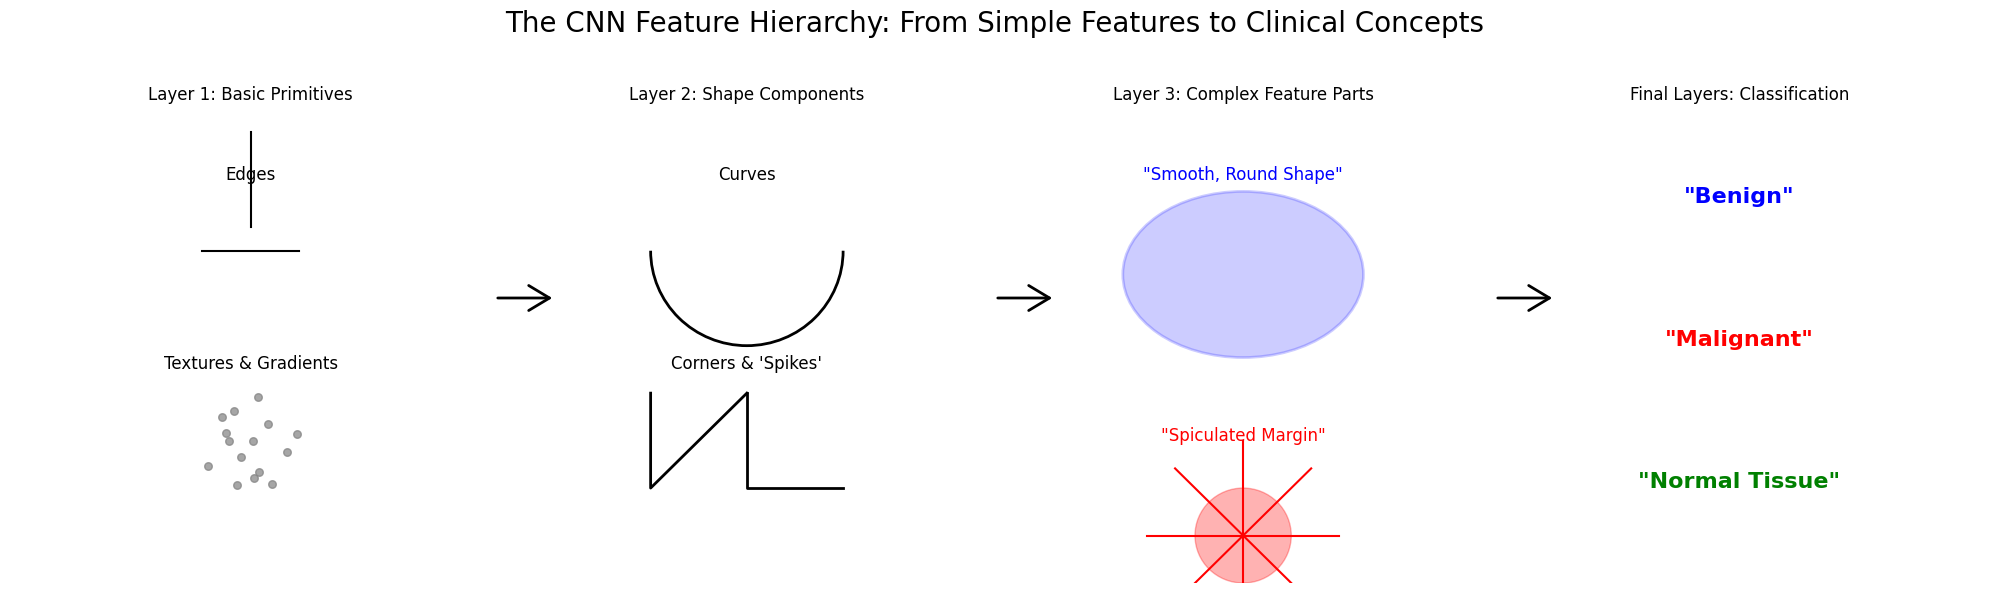

##Summary the CNN Workflow

1. <font color="mediumslateblue">Input</font>: The computer sees the medical image as a grid of pixel values.
2. <font color="mediumslateblue">Convolution</font>: Filters slide over the image/feature maps to find specific patterns.
3. <font color="mediumslateblue">ReLU</font>: Activates the found features.
4. <font color="mediumslateblue">Pooling</font>: Summarizes the features to make them more robust and efficient.
5. <font color="mediumslateblue">Hierarchy</font>: This process is repeated, with each layer building more complex features from the last.
6. <font color="mediumslateblue">Flatten</font>: The final high-level features are unrolled into a list.
7. <font color="mediumslateblue">Fully Connected Layers</font>: These layers weigh the evidence from the features to make a final prediction (e.g., probability of malignancy).

#<font color="mediumslateblue">No Code Version</font>

##What You Will Need:

- Zipped folder of <font color="mediumslateblue">training</font> image data
- Zipped folder of <font color="mediumslateblue">testing</font> image data with the same class subfolder structure.
- <font color="mediumslateblue">JPG</font> images that you want to make predictions on.

Just hit run. 😀

In [ ]:
#@title MDPlus CNN APP - Hit Play and follow the generated link to Run
!pip install -q gradio torch torchvision matplotlib

import gradio as gr
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torchvision import models, datasets
from PIL import Image
import zipfile
import os
import tempfile
from gradio.themes.utils import colors

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

def train_and_predict(train_zip_file, test_zip_file, epochs, lr, image_to_predict):

    if not train_zip_file or not test_zip_file:
        raise gr.Error("Please upload both a training and a testing ZIP file.")

    log_output = []

    with tempfile.TemporaryDirectory() as train_dir, tempfile.TemporaryDirectory() as test_dir:
        log_output.append("Extracting training data...")
        yield "\n".join(log_output), "", None
        with zipfile.ZipFile(train_zip_file.name, 'r') as z:
            z.extractall(train_dir)

        log_output.append("Extracting testing data...")
        yield "\n".join(log_output), "", None
        with zipfile.ZipFile(test_zip_file.name, 'r') as z:
            z.extractall(test_dir)

        train_data_path = next(os.path.join(train_dir, d) for d in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, d)))
        test_data_path = next(os.path.join(test_dir, d) for d in os.listdir(test_dir) if os.path.isdir(os.path.join(test_dir, d)))

        log_output.append("Loading datasets...")
        yield "\n".join(log_output), "", None
        trainset = datasets.ImageFolder(root=train_data_path, transform=transform)
        testset = datasets.ImageFolder(root=test_data_path, transform=transform)

        trainloader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True, num_workers=2)
        testloader = torch.utils.data.DataLoader(testset, batch_size=32, shuffle=False, num_workers=2)

        classes = trainset.classes
        log_output.append(f"Detected classes: {', '.join(classes)}")
        yield "\n".join(log_output), "", None

        log_output.append("Preparing model (ResNet-18)...")
        yield "\n".join(log_output), "", None
        model = models.resnet18(weights=models.ResNet18_Weights.DEFAULT)
        num_ftrs = model.fc.in_features
        model.fc = nn.Linear(num_ftrs, len(classes))
        model = model.to(device)

        criterion = nn.CrossEntropyLoss()
        optimizer = optim.Adam(model.parameters(), lr=lr)

        log_output.append("\n--- Starting Training ---")
        yield "\n".join(log_output), "", None
        model.train()
        for epoch in range(int(epochs)):
            running_loss = 0.0
            for inputs, labels in trainloader:
                inputs, labels = inputs.to(device), labels.to(device)
                optimizer.zero_grad()
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()
                running_loss += loss.item()

            epoch_loss = running_loss / len(trainloader)
            log_output.append(f"Epoch {epoch+1}/{int(epochs)} | Loss: {epoch_loss:.4f}")
            yield "\n".join(log_output), "", None

        log_output.append("--- Training Complete ---")
        yield "\n".join(log_output), "", None

        log_output.append("\n--- Evaluating on Test Set ---")
        yield "\n".join(log_output), "", None
        model.eval()
        correct = total = 0
        with torch.no_grad():
            for inputs, labels in testloader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (preds == labels).sum().item()

        accuracy = 100 * correct / total
        test_accuracy_str = f"{accuracy:.2f}%"
        log_output.append(f"Final Test Accuracy: {test_accuracy_str}")
        yield "\n".join(log_output), test_accuracy_str, None

        prediction_result = None
        if image_to_predict is not None:
            log_output.append("\n--- Making a Prediction ---")
            yield "\n".join(log_output), test_accuracy_str, None
            model.eval()
            img = image_to_predict.convert("RGB")
            inp = transform(img).unsqueeze(0).to(device)
            with torch.no_grad():
                out = model(inp)
                probabilities = torch.nn.functional.softmax(out, dim=1)[0]
                prediction_result = {classes[i]: float(probabilities[i]) for i in range(len(classes))}
            log_output.append("Prediction complete.")
        else:
            log_output.append("\nNo image provided for prediction.")

    yield "\n".join(log_output), test_accuracy_str, prediction_result

md_plus_theme = gr.themes.Base(
    font=["Inter", "Arial", "sans-serif"],
    font_mono=["Cousine", "ui-monospace", "monospace"],
).set(
    body_text_color="#001858",
    body_text_color_subdued=colors.gray.c600,
    background_fill_primary="#FFFFFF",
    background_fill_secondary="#F7F7F7",
    border_color_accent="#F7F7F7",
    border_color_primary="#F7F7F7",

    button_primary_background_fill="#ffc425",
    button_primary_background_fill_hover="#ffd45c",
    button_primary_text_color="#001858",

    button_secondary_background_fill="#0072ce",
    button_secondary_background_fill_hover="#338eda",
    button_secondary_text_color="#FFFFFF",

    slider_color="#0072ce",
    block_label_background_fill="#001858",
    block_label_text_color="#FFFFFF",
    block_title_text_color="#001858",
)

with gr.Blocks(theme=md_plus_theme) as demo:
    gr.Markdown(
        """
        # MDPlus CNN Image Classifier Trainer

        Train a ResNet-18 model on your own image dataset and then test it with a new image.

        **Instructions:**
        1.  Prepare your data: Create two `.zip` files, one for `train` and one for `test`.
        2.  Inside each zip, your images must be organized into subfolders, where each the header folder is titled 'train'/'test' and subfolder is a class name (e.g., `cats/`, `dogs/`).
        3.  Upload your `train.zip` and `test.zip` files.
        4.  Adjust the training hyperparameters (Epochs, Learning Rate).
        5.  (Optional) Upload a single image to classify after the model is trained.
        6.  Click "Start Training and Prediction".
        """
    )

    with gr.Row():
        with gr.Column(scale=1):
            gr.Markdown("### 1. Inputs")
            train_zip = gr.File(label="Upload Train ZIP File")
            test_zip = gr.File(label="Upload Test ZIP File")

            gr.Markdown("### 2. Hyperparameters")
            epochs_slider = gr.Slider(minimum=1, maximum=50, value=5, step=1, label="Number of Epochs")
            lr_slider = gr.Slider(minimum=1e-5, maximum=1e-2, value=1e-3, step=1e-5, label="Learning Rate", info="A smaller value like 0.001 is a good start.")

            gr.Markdown("### 3. Image to Predict")
            predict_image_input = gr.Image(type="pil", label="Upload an image for classification")

        with gr.Column(scale=2):
            gr.Markdown("### 4. Run & See Results")
            start_button = gr.Button("Start Training and Prediction", variant="primary")

            training_log = gr.Textbox(label="Training Log", lines=15, interactive=False, autoscroll=True)

            with gr.Row():
                test_accuracy = gr.Label(label="Final Test Accuracy")
                prediction_output = gr.Label(label="Prediction Result")

    start_button.click(
        fn=train_and_predict,
        inputs=[train_zip, test_zip, epochs_slider, lr_slider, predict_image_input],
        outputs=[training_log, test_accuracy, prediction_output]
    )

if __name__ == "__main__":
    demo.launch(debug=False, share=False,inline=False)

#<font color="mediumslateblue">Beginner Version</font>

## Setting Up the Environment

In this section, we install and import the necessary <font color="mediumslateblue">dependencies</font> for our image classification project. Running the below code will install and import these libraries.  We are using:

- <font color="mediumslateblue">PyTorch</font>: A powerful deep learning framework.
- <font color="mediumslateblue">Torchvision</font>: Offers datasets, pre-trained models, and image transformations.
- <font color="mediumslateblue">Matplotlib</font>: Used for plotting and visualizing data

In [ ]:
!pip install torch torchvision matplotlib

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from torchvision import models

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

## Data Preparation

This section prepares the computing environment and data for training our image classification model.  First we need image data to train our model on and for this script we will load the **CIFAR-10** dataset.  

- **Loading the CIFAR-10 Dataset:**  
  The <font color="mediumslateblue">CIFAR-10</font> dataset is downloaded and split into training and testing sets. This dataset contains 60,000 images across 10 classes:

  *airplane, car, bird, cat, deer, dog, frog, horse, ship, truck*
  
  Before we load the images, we apply a few transformations. We convert the images to a format that PyTorch understands and we <font color="mediumslateblue">normalize</font> the pixel values so that they are easier for the model to learn from.

In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

- **Creating DataLoaders:**  
  DataLoaders manage how the data is fed into the model in batches. Here, a <font color="mediumslateblue">`batch_size`</font> of 32 means the model processes 32 images at a time, and shuffling (<font color="mediumslateblue">`shuffle=True`</font>) the training data helps to improve learning.  You can modify this <font color="mediumslateblue">`batch_size`</font> value based on the computing power of your machine.

In [ ]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(testset, batch_size=32, shuffle=False, num_workers=2)

##Model Setup and Configuration

Now we will set up the model we are going to use. We are using a pretrained model called <font color="mediumslateblue">ResNet18</font>.

- **Loading the ResNet18 Model:**  
  The pretrained <font color="mediumslateblue">ResNet18</font> model is originally designed to classify images into 1000 classes (<font color="mediumslateblue">ImageNet</font>). To adapt it to CIFAR-10 (or any other custom dataset), we modify the final fully-connected layer to match the number of classes (10 in this case).

In [ ]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

model = models.resnet18(pretrained=True)

num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, len(classes))

model = model.to(device)

- **Loss Function:**  
  We need the model to be able to measure its errors and this is done through what is know as a <font color="mediumslateblue">loss function</font>. The loss function compares the model’s predictions to the correct answers and tells us how far off the model is.
- **Optimizer:**  
  The model also needs to know how to improve based on those mistakes and this is done using an <font color="mediumslateblue">optimizer</font>. The optimizer updates the model's internal settings (called weights) to help it make better predictions next time.  The <font color="mediumslateblue">learning rate</font> is represented by <font color="mediumslateblue">`lr`</font> and controls how large the updates are each time.

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

##Training Evaluation and Prediction

- **Training the Model:**  
  The goal of training is to help the model learn from the dataset. The training function shows the model many images, tells it the correct answer for each one, and lets it adjust itself when it gets things wrong.  Our <font color="mediumslateblue">`train_model()`</font> function handles the training process by looping through our dataset multiple times, collectively known as <font color="mediumslateblue">epochs</font>.  <font color="mediumslateblue">`num_epochs`</font> value can be modified to improve performance.  


In [ ]:
def train_model(model, criterion, optimizer, num_epochs=5):
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        for inputs, labels in trainloader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f"Epoch {epoch+1}, Loss: {running_loss/len(trainloader):.4f}")
    print("Training complete")

- **Evaluating the Model:**  
  The <font color="mediumslateblue">`test_model()`</font> function assesses how well the trained model generalizes to new, unseen data.  In broad terms, it processes our test dataset, calculates predictions, and compares these predictions to the true labels.  Note that in this function we set the model to
  <font color="mediumslateblue">evaluation mode</font> [<font color="mediumslateblue">`model.eval()`</font>] which comes with some caveats explained below:

  - **Evaluation Mode:**  
  During training, <font color="mediumslateblue">dropout</font> is active and randomly turns off some neurons to prevent the model from memorizing the training data (this is called <font color="mediumslateblue">overfitting</font>).  Separately we instruct for the script to not track <font color="mediumslateblue">gradients</font> which are used during training to adjust the model's weights but they are not necessary when testing or making predictions.

In [ ]:
def test_model(model):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in testloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    print(f'Accuracy: {100 * correct / total:.2f}%')

- **Call Model Prediction:**  
  The <font color="mediumslateblue">`predict_image()`</font> function will allow us to then feed the model any image input and receive a predicted label output from our now trained model.


  Note that this is where the training is called and so this block will take some time to run.

In [ ]:
def predict_image(image_path, model):
    from PIL import Image
    model.eval()
    transform = transforms.Compose([
        transforms.Resize((32, 32)),
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])
    image = Image.open(image_path)
    image = transform(image).unsqueeze(0).to(device)
    with torch.no_grad():
        outputs = model(image)
        _, predicted = torch.max(outputs, 1)
    print(f'Predicted: {classes[predicted.item()]}')

train_model(model, criterion, optimizer, num_epochs=5)
test_model(model)

##Generate a Prediction

This final section will allow you to test your model.
Modify the <font color="mediumslateblue">`image_url`</font> to any online custom image you can find that the model will attempt to make a prediction on. Remember that we trained the model specifically on the 10 classes in the CIFAR-10 dataset currently and so the image should fall under one of those classes.

  *airplane, car, bird, cat, deer, dog, frog, horse, ship, truck*

In [ ]:
import requests
from PIL import Image
from io import BytesIO

image_url = "https://upload.wikimedia.org/wikipedia/commons/3/3a/Cat03.jpg"
response = requests.get(image_url)

online_image = Image.open(BytesIO(response.content)).convert("RGB")

test_image_path = "online.jpg"
online_image.save(test_image_path)

predict_image(test_image_path, model)


#<font color="goldenrod">Advanced Version</font>

## Setting Up the Environment

In this section, we install and import the necessary <font color="goldenrod">dependencies</font> for our convolutional neural network. We import <font color="goldenrod">`medmnist`</font> which is a large, standardized collection of small medical images.  Then, we import all necessary modules, including standard Python libraries such as <font color="goldenrod">`numpy`</font> and <font color="goldenrod">`matplotlib`</font> to help us manipulate our data and visualize our results.  We also import essential components from <font color="goldenrod">`torch`</font> and <font color="goldenrod">`torchvision`</font> for building and training the network.

In [ ]:
!pip install -q torch torchvision torchaudio --upgrade
!pip install -q medmnist

import os, math, time, random
from dataclasses import dataclass
import numpy as np
import torch, torchvision
from medmnist import PathMNIST
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torch.cuda.amp import GradScaler, autocast

##Parameter Configuration

This section sets up our <font color="goldenrod">dataclass</font>, which neatly groups all hyperparameters and settings into a single configuration object.  This class holds values that are critical for defining how our **CNN** learns.

- <font color="goldenrod">**`num_epochs` (Number of Epochs)**</font>: This determines the total number of times the CNN will see the entire training dataset. An <font color="goldenrod">epoch</font> is one full pass over all the training images. For a CNN, one pass is rarely enough to learn the complex visual patterns in the data. By iterating multiple times (<font color="goldenrod">`num_epochs`</font> = 5), the model can progressively refine its internal filters (weights) to better distinguish between classes. Too few epochs can lead to <font color="goldenrod">underfitting</font> (the model hasn't learned enough), while too many can lead to <font color="goldenrod">overfitting</font> (the model memorizes the training data instead of learning general features).

- <font color="goldenrod">**`bs` (Batch Size)**</font>: This is the number of images the model processes at once before performing a weight update. Instead of showing the CNN one image at a time, we show it a "batch" for optimal computational efficiency (in this case, 128 images).

- <font color="goldenrod">**`lr` (Learning Rate)**</font>: This parameter controls the <font color="goldenrod">step size</font> the model takes when adjusting its weights during training. After calculating the error for a batch, the <font color="goldenrod">optimizer</font> moves the weights in the direction that reduces the error. A high learning rate makes large adjustments, which can speed up learning but risks overshooting the optimal solution.

- <font color="goldenrod">**`wd` (Weight Decay)**</font>: This is a regularization technique to prevent <font color="goldenrod">overfitting</font>. It adds a small penalty to the <font color="goldenrod">loss function</font> that discourages the model's weights from growing too large. In a CNN, this forces the model to learn simpler, more generalizable patterns rather than memorizing the noise and specific details of the training images.

In [ ]:
@dataclass
class CFG:
    seed          = 42
    num_epochs    = 5
    bs            = 128
    lr            = 3e-3
    wd            = 1e-4
    img_size      = 28
    num_workers   = 2
    pin_memory    = True
    amp           = True
    log_interval  = 100
    ckpt_path     = "med_ckpt.pt"

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

##Seeding and Reproducibility

This section ensures that the experiment is reproducible, meaning it will produce the same results every time it is run with the same configuration.  The <font color="goldenrod">`set_seed`</font> function sets the <font color="goldenrod">random seed</font> for all libraries involved in generating random numbers: Python's built-in random module, NumPy, and PyTorch.

In [ ]:
def set_seed(seed: int = 42):
    random.seed(seed);  np.random.seed(seed)
    torch.manual_seed(seed); torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

set_seed(CFG.seed)

##Data Preparation

This section prepares the raw medical image data into a format that the CNN can learn from. Here we use <font color="goldenrod">PathMNIST</font> which is a medical imaging dataset containing thousands of histology images of colorectal cancer tissues.


The <font color="goldenrod">`DataLoader`</font> is responsible for grouping the data into batches and serves them to the model during training and evaluation. A critical difference is the <font color="goldenrod">`shuffle=True`</font> parameter for the training loader (<font color="goldenrod">`train_dl`</font>). This shuffles the order of the images at the beginning of every epoch, which is essential for effective training as it prevents the model from learning any spurious patterns based on the data's original sequence.

In [ ]:
train_tf = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[.5], std=[.5])
])
test_tf = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[.5], std=[.5])
])

train_ds = PathMNIST(split='train', download=True, transform=train_tf)
test_ds  = PathMNIST(split='test',  download=True, transform=test_tf)

train_dl = DataLoader(train_ds, batch_size=CFG.bs, shuffle=True,
                      num_workers=CFG.num_workers, pin_memory=CFG.pin_memory)
test_dl  = DataLoader(test_ds,  batch_size=CFG.bs, shuffle=False,
                      num_workers=CFG.num_workers, pin_memory=CFG.pin_memory)

class_names = list(train_ds.info['label'].values())
print("Classes:", class_names)

##Model Architecture

This code defines the structure of our <font color="goldenrod">Convolutional Neural Network (CNN)</font>, that will learn to classify the medical images. It's built as a <font color="goldenrod">`SmallCNN`</font> class that inherits from PyTorch's nn.Module. The architecture is split into two distinct, sequential parts that you should find familiar by now: <font color="goldenrod">`self.features`</font> and <font color="goldenrod">`self.classifier`</font>.

- <font color="goldenrod">**`self.features`**</font>: The convolutional base of the network with a series of layers:

  - <font color="goldenrod">`nn.Conv2d` (Convolutional Layer)</font>: This is the core building block of a CNN. It slides small filters (in this case, 3x3) across the image to detect basic patterns like edges, textures, and colors. The first layer takes 3 input channels (for the RGB image) and produces 32 output feature maps.
  - <font color="goldenrod">`nn.ReLU` (Rectified Linear Unit)</font>: This is an activation function that introduces non-linearity into the model, allowing it to learn much more complex relationships in the data. It simply converts all negative values to zero.  Because <font color="goldenrod">ReLU</font> outputs zero for all negative inputs, it effectively "turns off" a portion of the neurons in the network for any given input. This creates a <font color="goldenrod">sparse representation</font>, where only a subset of highly specialized, attuned neurons are active.
  - <font color="goldenrod">`nn.MaxPool2d` (Max Pooling)</font>: This layer downsamples the <font color="goldenrod">feature maps</font>, reducing their spatial dimensions (from 28x28 down to 14x14, then to 7x7). This makes the model more computationally efficient and helps it achieve <font color="goldenrod">"translation invariance,"</font> meaning it becomes less sensitive to the exact location of a feature in the image.

- <font color="goldenrod">**`self.classifier`**</font>: This takes the high-level feature maps produced by the feature extractor and performs the final classification.

  - <font color="goldenrod">`nn.Flatten()`</font>: The output of the convolutional base is a 3D tensor of shape [128, 7, 7]. This layer flattens it into a <font color="goldenrod">single long 1D vector</font> (128 * 7 * 7 = 6272 elements) so it can be fed into standard dense layers.
  - <font color="goldenrod">`nn.Linear` (Fully Connected Layer)</font>: These are the classic <font color="goldenrod">neural network layers</font> that perform the classification based on the extracted features. The first Linear layer maps the 6272 features to an intermediate space of 256 neurons. The final Linear layer maps these 256 neurons to the 9 output classes, producing a raw score (<font color="goldenrod">logit</font>) for each class.
  - <font color="goldenrod">`nn.Dropout`</font>: This is a <font color="goldenrod">regularization</font> technique that randomly sets a fraction of neuron activations (20% in this case) to zero during training. This prevents the model from becoming too reliant on any single neuron and forces it to learn more robust, distributed representations, thus reducing overfitting.

In [ ]:
class SmallCNN(nn.Module):
    def __init__(self, num_classes: int = 9):
        super().__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 32, 3, padding=1), nn.BatchNorm2d(32), nn.ReLU(),
            nn.Conv2d(32, 64, 3, padding=1), nn.BatchNorm2d(64), nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(64, 128, 3, padding=1), nn.ReLU(),
            nn.MaxPool2d(2),
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(128 * 7 * 7, 256), nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(256, num_classes)
        )

    def forward(self, x): return self.classifier(self.features(x))

model = SmallCNN(len(class_names)).to(device)
print("Parameter count:", sum(p.numel() for p in model.parameters())/1e3, "K")

##Optimizer and Loss Function

This section takes the error measured in the model's predictions and uses it to guide the model's weights toward a state that produces more accurate classifications.

- <font color="goldenrod">Optimizer (`opt`)</font>: The optimizer is the algorithm that actually updates the model's weights. After calculating the model's error (<font color="goldenrod">the loss</font>), the optimizer's job is to decide exactly how to adjust each weight to minimize that error. We use <font color="goldenrod">AdamW</font>, a very popular and robust choice. It's an <font color="goldenrod">adaptive optimizer</font>, meaning it maintains a separate <font color="goldenrod">learning rate</font> for each weight and adapts it as learning progresses. The "W" signifies that it implements an improved method for <font color="goldenrod">weight decay</font> (a <font color="goldenrod">regularization</font> technique), which helps prevent overfitting more effectively than the original Adam algorithm.

- <font color="goldenrod">Learning Rate Scheduler (`sched`)</font>: The learning rate controls the size of the steps the optimizer takes. A static learning rate is often not optimal. The <font color="goldenrod">scheduler</font> dynamically adjusts this rate during training. We use <font color="goldenrod">OneCycleLR</font>. It starts with a small learning rate, gradually increases it to a maximum value partway through training, and then steadily decreases it for the remainder. The increasing rate helps the model jump out of suboptimal valleys early on, while the long decay phase allows it to settle carefully into a stable minimum.

- <font color="goldenrod">Loss Function (`crit`)</font>: The loss function, or <font color="goldenrod">criterion</font>, quantifies how wrong the model's predictions are compared to the true labels. The optimizer's entire goal is to minimize the number produced by this function. We use <font color="goldenrod">`nn.CrossEntropyLoss`</font>. It does two things internally: it applies a <font color="goldenrod">softmax function</font> to the model's raw output to convert it into probabilities, and then it calculates the <font color="goldenrod">loss</font>. It heavily penalizes predictions that are both wrong and confident, which strongly pushes the model toward making correct and confident predictions.

In [ ]:
opt = torch.optim.AdamW(model.parameters(), lr=CFG.lr, weight_decay=CFG.wd)
sched = torch.optim.lr_scheduler.OneCycleLR(opt, max_lr=CFG.lr,
                                            steps_per_epoch=len(train_dl),
                                            epochs=CFG.num_epochs)
crit = nn.CrossEntropyLoss()
scaler = GradScaler(enabled=CFG.amp)

##Training Loop

This function encapsulates the logic for a single epoch.  It starts by setting the model to the appropriate mode (<font color="goldenrod">`model.train()`</font> or <font color="goldenrod">`model.eval()`</font>).  Inside the loop over the data loader, it moves data to the device, performs a forward pass to get predictions, and calculates the loss. If in training mode, it performs the full <font color="goldenrod">backpropagation and optimization cycle</font>:

1. <font color="goldenrod">`scaler.scale(loss).backward()`</font>: Scales the loss and computes gradients.
2. <font color="goldenrod">`scaler.step(opt)`</font>; <font color="goldenrod">`scaler.update()`</font>: Updates the model weights via the optimizer.
3. <font color="goldenrod">`opt.zero_grad()`</font>: Clears gradients for the next iteration.
4. <font color="goldenrod">`sched.step()`</font>: Updates the learning rate.


The function continuously tracks total loss and the number of correct predictions to calculate and return the average loss and overall accuracy for the epoch.

In [ ]:
def loop(loader, train: bool = True):
    model.train() if train else model.eval()
    tot_loss = tot_correct = tot = 0
    ctx = autocast(enabled=CFG.amp) if train else torch.no_grad()
    with ctx:
        for i, (x, y) in enumerate(loader):
            x, y = x.to(device, non_blocking=True), y.to(device, non_blocking=True)
            out = model(x)
            y = y.squeeze(-1)
            loss = crit(out, y)

            if train:
                scaler.scale(loss).backward()
                scaler.step(opt); scaler.update(); opt.zero_grad(); sched.step()

            preds = out.argmax(1)
            tot_correct += (preds == y).sum().item()
            tot += y.size(0); tot_loss += loss.item()

            if train and (i+1) % CFG.log_interval == 0:
                print(f"  step {i+1}/{len(loader)}  loss {loss.item():.3f}")

    return tot_loss / len(loader), 100. * tot_correct / tot

This section orchestrates the entire training process.  It enters a loop that runs for the <font color="goldenrod">number of epochs</font> specified in the configuration (in the default case, 5). In each epoch, it calls the loop function once for training and once for validation. After each epoch, it prints a summary of the training and validation performance metrics and the time taken. If the current epoch's <font color="goldenrod">validation accuracy</font> is better than any seen before, it updates <font color="goldenrod">`best_acc`</font> and saves the model's current weights (<font color="goldenrod">`state_dict`</font>) to the <font color="goldenrod">checkpoint file</font>.

In [ ]:
best_acc = 0.0
for epoch in range(1, CFG.num_epochs+1):
    t0 = time.time()
    train_loss, train_acc = loop(train_dl, train=True)
    val_loss,   val_acc   = loop(test_dl,  train=False)

    print(f"Epoch {epoch:02d} | "
          f"train {train_loss:.3f}/{train_acc:.2f}% | "
          f"val {val_loss:.3f}/{val_acc:.2f}% | "
          f"{time.time()-t0:.1f}s")

    if val_acc > best_acc:
        best_acc = val_acc
        torch.save(model.state_dict(), CFG.ckpt_path)
        print("checkpoint saved.")

##Prediction and Validation

This final chunk demonstrates how to use the trained model for prediction on a new, unseen sample. It selects a single image and its corresponding label from the test dataset and displays the image using <font color="goldenrod">`matplotlib`</font>. It then loads the best-performing model weights from the saved <font color="goldenrod">checkpoint file</font> into the model structure. After setting the model to evaluation mode with <font color="goldenrod">`model.eval()`</font>, it performs inference.  

The model's output prediction is determined by finding the class with the highest score (<font color="goldenrod">`.argmax(1)`</font>), and the result is printed alongside the ground-truth label for comparison.  Modify the <font color="goldenrod">`idx`</font> number to test out different images.

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

idx = 0
img, label = test_ds[idx]
plt.imshow(img.permute(1, 2, 0)); plt.axis("off")
print("Ground-truth label:", class_names[label])

model.load_state_dict(torch.load(CFG.ckpt_path, map_location=device))
model.eval()
with torch.no_grad(), autocast(enabled=CFG.amp):
    pred = model(img.unsqueeze(0).to(device)).argmax(1).item()
print("Predicted label  :", class_names[pred])

#<font color="mediumslateblue">BONUS: MNIST DATASET INTEGRATION</font>


Here is a bonus code snippet that follows the ResNet workflow from the Beginner Version but now uses the more clinically relevant ChestMNIST dataset that contains Chest X-Ray images with classifications for:
- Atelectasis, cardiomegaly, effusion, infiltration, mass, nodule, pneumonia, pneumothorax, consolidation, edema, emphysema, fibrosis, pleural, hernia

Note that the training here will take quite some time but feel free to test it out and explore the other MNIST datasets out there (e.g. Pathology, Fundus Imaging, Dermatoscope, Breast US etc.).  If this is taking too long, you should notice that there are two lines that start with `#trainset` and `#testset`.  Delete the `#` and run the code block again.

In [ ]:
!pip install torch torchvision matplotlib medmnist tqdm

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import random
from torchvision import models
from medmnist import INFO
from medmnist.dataset import ChestMNIST
from PIL import Image
from google.colab import files
from tqdm import tqdm
from torch.utils.data import Subset
from torchvision.models import resnet18, ResNet18_Weights

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

info = INFO['chestmnist']
DataClass = ChestMNIST
classes = info['label']
print(classes)
num_classes = len(classes)

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.Grayscale(num_output_channels=3),
    transforms.ToTensor(),
    transforms.Normalize(mean=[.5], std=[.5])
])

trainset = DataClass(split='train', transform=transform, download=True)
testset = DataClass(split='test', transform=transform, download=True)

#trainset = Subset(trainset, random.sample(range(len(trainset)), 2000))
#testset = Subset(testset, random.sample(range(len(testset)), 500))

trainloader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=32, shuffle=False)

model = resnet18(weights=ResNet18_Weights.DEFAULT)
num_ftrs = model.fc.in_features
model.fc = nn.Sequential(
    nn.Linear(num_ftrs, num_classes),
    nn.Sigmoid()
)
model = model.to(device)

criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

def train_model(model, criterion, optimizer, num_epochs=5):
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        batch_bar = tqdm(trainloader, desc=f"Epoch {epoch+1}/{num_epochs}", leave=False)
        for inputs, labels in batch_bar:
            inputs = inputs.to(device)
            labels = labels.float().to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            batch_bar.set_postfix(loss=loss.item())
        print(f"Epoch {epoch+1} Completed — Avg Loss: {running_loss/len(trainloader):.4f}")
    print("Training complete")

def test_model(model, threshold=0.5):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in testloader:
            inputs = inputs.to(device)
            labels = labels.float().to(device)
            outputs = model(inputs)
            predicted = (outputs > threshold).float()
            correct += (predicted == labels).sum().item()
            total += labels.numel()
    print(f'Accuracy (threshold {threshold}): {100 * correct / total:.2f}%')

def predict_image(image_path, model, threshold=0.5):
    model.eval()
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.Grayscale(num_output_channels=3),
        transforms.ToTensor(),
        transforms.Normalize(mean=[.5], std=[.5])
    ])
    image = Image.open(image_path).convert("L")
    image = transform(image).unsqueeze(0).to(device)

    with torch.no_grad():
        outputs = model(image)
        probs = outputs.squeeze().cpu().numpy()
        predicted = (probs > threshold).astype(int)

    print("Class Probabilities:")
    for i, p in enumerate(probs):
        print(f"{classes[i]}: {p:.3f}")

    active_labels = [classes[i] for i in range(len(predicted)) if predicted[i] == 1]
    print(f'\nPredicted labels (threshold={threshold}): {active_labels if active_labels else ["Unable to identify"]}')


train_model(model, criterion, optimizer, num_epochs=5)
test_model(model)

***Note:  You only need to run the training code block above ONCE to complete training and then you can run as many predictions using the code block below.***

In [ ]:
uploaded_file = files.upload()
image_path = next(iter(uploaded_file))
predict_image(image_path, model)